<a href="https://colab.research.google.com/github/JuanCReyes1/DataScienceinPython/blob/master/MachineLearningPrincipalComponentsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CSCI 6505 - Machine Learning 

## Data Dimensionality Reduction 
### Principal Components Analysis for Data Visualization

### Dalhousie University
### Juan C. Reyes

#### The IRIS Dataset

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

#Import the Iris Dataset

In [0]:
from sklearn.datasets import load_iris

iris_data_sk = load_iris() #import data from the sklearn datasets library

iris_data_pd = pd.DataFrame(iris_data_sk.data, columns = iris_data_sk.feature_names) #convert to a pandas dataframe
iris_data_pd['target'] = pd.Series(iris_data_sk.target) #create and append a new column for target features

#dataset feature names
features = iris_data_pd.columns[0:4] #the feature names of the IRIS dataset 
#######target value dictionaries########

#dictionary containing numeric index values to convert target names
dictionary = {
    0: str(iris_data_sk.target_names[0]),
    1: str(iris_data_sk.target_names[1]),
    2: str(iris_data_sk.target_names[2])
}

#dictionary containing  target names to index value
inverted_dict = dict(map(reversed, dictionary.items()))

##Converting numeric indices to their names
iris_data_pd = iris_data_pd.replace({'target': dictionary})
##Converting names back to numeric indices
#iris_data_pd = iris_data_pd.replace({'target': inverted_dict})
#Another way of doing so
#iris_data_pd["target"] = iris_data_pd["target"].map(inverted_dict)

Obtain general information regarding the dataset:

In [5]:
iris_data_pd.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Observe the first 5 rows from the dataset:

In [6]:
iris_data_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Obtain more general statistics by creating a pairplot using the seaborn library.

A pairplot plots the pairwise relationships in the datset. 
The function creates a grid of Axes such that each numeric variable in data is shared in the y-axis across a single row, and in the x-axis across a single column.

The diagonal axes draw a plot to show the univariate distribution of the data for the variable in that column.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


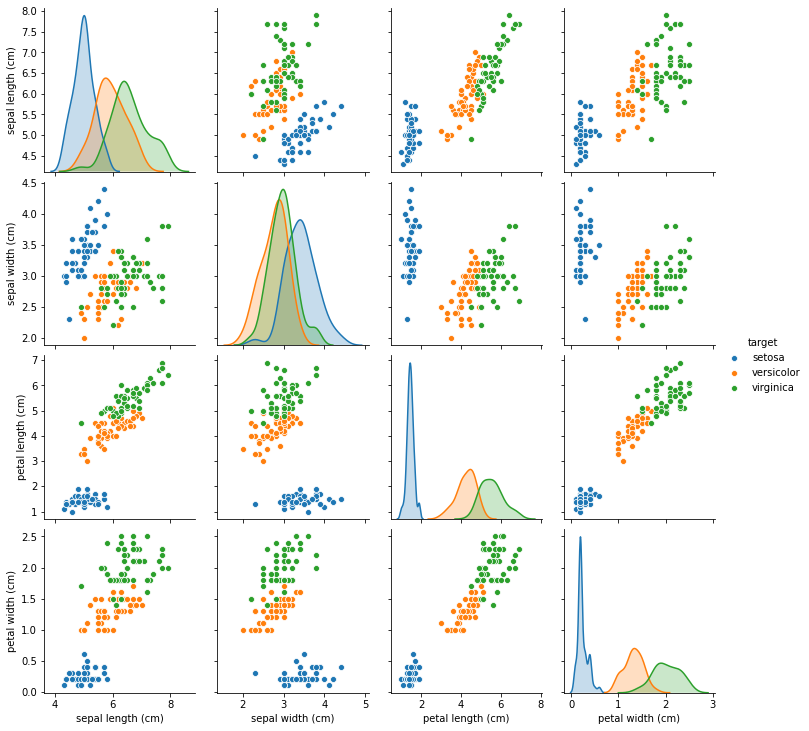

In [7]:
import seaborn as sb
sb.pairplot(iris_data_pd.dropna(), hue='target');

# Preparation for applying Principal Components Analysis

Begin by partitioning our data.

x: contains our feature's data.

y: contains our target values.

In [0]:
x = iris_data_pd.loc[:,features].values
y = iris_data_pd.loc[:, ['target']].values

We apply the fit_transform() function to take our data, calculate the average and standard deviation. Given these parameters we apply sklearn's StandardScaler() function which standardizes features by removing the mean and scaling to unit variance.


In [0]:
x = StandardScaler().fit_transform(x)

## Display the scaled data:

In [0]:
pd.DataFrame(data = x, columns = features ).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


# Principal Components Analysis

**Principal components analysis** (PCA) is one of a family of techniques for taking high-dimensional data, and using the dependencies between the variables to represent it in a more tractable, lower-dimensional form. PCA is a relatively simple way of performing **dimensionality reduction**. 

It turns out that the geometry of the resulting coordinate system is determined by the Principal Components that are uncorrelated (orthogonal) to each other, but display maximal correlation with the measurements.

In the following code we will apply PCA to the scaled IRIS data to obtain the data onto a q=4 dimensional space. We will then project onto lower dimensions to visualize the data and study wether the technique was helpful in classifying the distinct IRIS classes.

Retaining Four Dimensions:

In [14]:
n_components = 4
pca= PCA(n_components)
principalComponents = pca.fit_transform(x)
principalDF = pd.DataFrame(data = principalComponents,
                           columns = ['PCA1','PCA2','PCA3','PCA4'])

principalDF

,PCA1,PCA2,PCA3,PCA4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923
...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257
146,1.564580,-0.896687,-0.026371,-0.220192
147,1.521170,0.269069,0.180178,-0.119171
148,1.372788,1.011254,0.933395,-0.026129


In [15]:
iris_data_pd['target']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: target, Length: 150, dtype: object

In [16]:
principalDFcomp = pd.concat([principalDF, iris_data_pd[['target']]],axis = 1)
principalDFcomp

,PCA1,PCA2,PCA3,PCA4,target
0,-2.264703,0.480027,-0.127706,-0.024168,setosa
1,-2.080961,-0.674134,-0.234609,-0.103007,setosa
2,-2.364229,-0.341908,0.044201,-0.028377,setosa
3,-2.299384,-0.597395,0.091290,0.065956,setosa
4,-2.389842,0.646835,0.015738,0.035923,setosa
...,...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257,virginica
146,1.564580,-0.896687,-0.026371,-0.220192,virginica
147,1.521170,0.269069,0.180178,-0.119171,virginica
148,1.372788,1.011254,0.933395,-0.026129,virginica


# Two-Dimensional Visualization

We begin by projecting our four dimensional data onto two dimensions to visualize all our data in this space.


In [20]:
import plotly.express as px
df = principalDFcomp
fig = px.scatter(df, x=principalDFcomp.columns[0], y=principalDFcomp.columns[1], color="target")
fig.show()

## Plotting the data with the last two principal components:

In [24]:
import plotly.express as px
df = principalDFcomp
fig = px.scatter(df, x=principalDFcomp.columns[2], y=principalDFcomp.columns[3], color="target")
fig.show()

## Plotting the data with the first three Principal Components

In [205]:
import plotly.express as px
df = principalDFcomp
fig = px.scatter_3d(df, x=principalDFcomp.columns[0], y=principalDFcomp.columns[1], z=principalDFcomp.columns[2], color="target",
                  symbol="target", 
                  color_discrete_map = {principalDFcomp.columns[0]: "blue", principalDFcomp.columns[1]: "green", principalDFcomp.columns[2]:"red"})

fig.update_traces(marker=dict(size=5,
                              line=dict(width=8,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()



The three classes appear to be separated with the first two principal components then the last two.

Versicolor and Virginica could see a better separation for the first two principal components.

# The Explained Variance

The explained variance gives us information (variance) that can be associated to each principal component. 

In [0]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

The results show that the first two principal components are able to retain about 94% of the information stored in the data. The first principal component retains 73% of the variance, and the second principal component contains about 22.85% of the variance. The third and fourth principal components contain the rest of the variance in the dataset.